# Customer Churn Prediction with Machine Learning

## Background Context
Customer churn, also known as customer attrition, is when a customer stops doing business with a bank or switches to another bank. In this project, we will build the entire process of building customer churn prediction model. We will prepocess the dataset - load and clean the data to use for our model training. We will use 5 different ML models, perform hyperparameter tuning and serve the model for inference through a web app.

SyntaxError: invalid syntax (3352234527.py, line 1)

In [ ]:
It is much more expensive to sign in a new client than

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
churn_df = pd.read_csv('churn.csv')
churn_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [125]:
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [127]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

<Axes: xlabel='Exited', ylabel='count'>

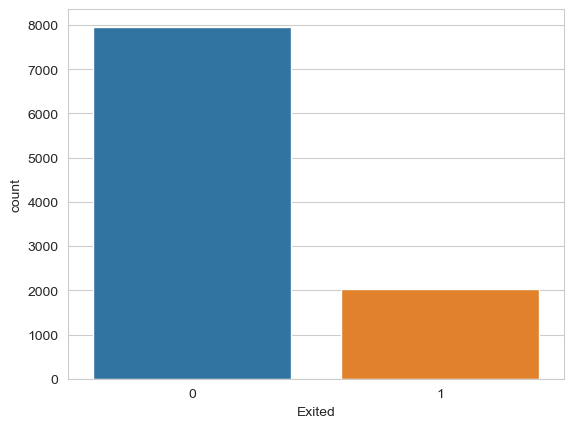

In [129]:
sns.countplot(x='Exited', data=churn_df)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age Distribution')

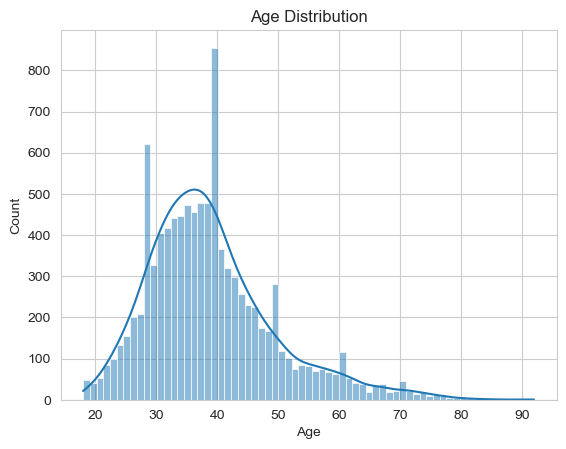

In [131]:
sns.histplot(data=churn_df, x ='Age', kde=True)
plt.title('Age Distribution')

As we see in the age distribution, we have two main groups: age 29 and age 41 that are dominate our sample.

Text(0.5, 1.0, 'Credit Score vs Age')

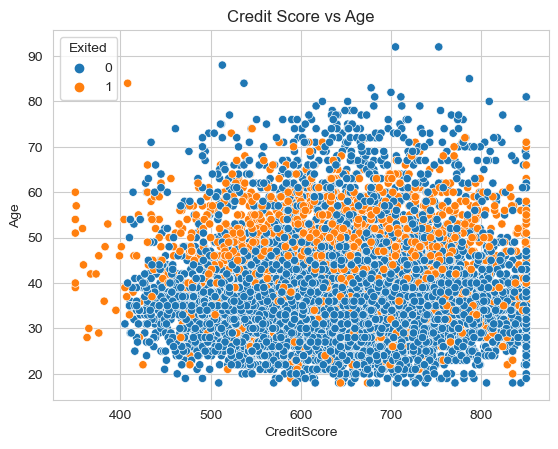

In [134]:
sns.scatterplot(data=churn_df, x='CreditScore', y='Age', hue='Exited')
plt.title('Credit Score vs Age')

In this plot, we see that the age group 40-60 years old are likely to churn

Text(0.5, 1.0, 'Balance Distribution by Churn')

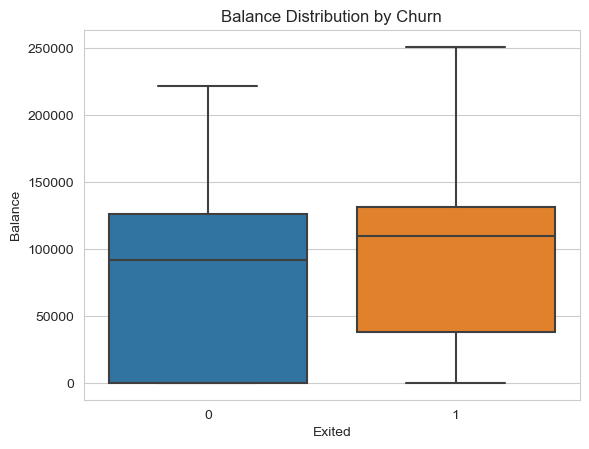

In [137]:
sns.boxplot(x='Exited', y='Balance', data=churn_df)
plt.title('Balance Distribution by Churn')

In this plot, we can see that people who who have account balances of $40,000+ tends to churn

Text(0.5, 1.0, 'Credit Score Distribution by Churn')

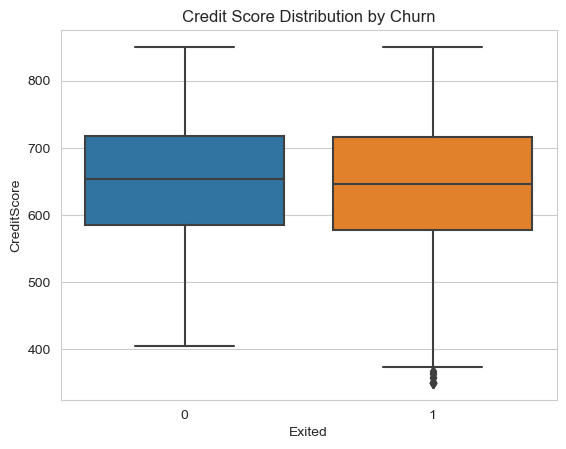

In [140]:
sns.boxplot(x='Exited', y='CreditScore', data=churn_df)
plt.title('Credit Score Distribution by Churn')

## Preprocessing the data
### 1. Separate feature and target variables
We need to separate the feature variables and the target variable. Features represent the different attributes of the customer, like their credit score, their balance, their age, their gender. And the target variable is a exited column which indicates whether the customer churned or not.

In [143]:
feature_variables = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
features = churn_df[feature_variables]

features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [145]:
target = df['Exited']
target

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### 2. Handle missing values

In [148]:
features = features.dropna()

### 3. Apply Categorical Encoding
Categorical Encoding expands categories in a feature by expanding the categories and encode 1 if they belong in that category or 0 if not.

In [159]:
encoded_features = pd.get_dummies(features, columns=['Geography', 'Gender'])
encoded_features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


### 4. Split the dataset

In [165]:
from sklearn.model_selection import train_test_split

In [197]:
X_train, X_test, y_train, y_test = train_test_split(encoded_features, target, test_size=0.2, random_state=42)

In [199]:
print(X_train.size, X_test.size)

104000 26000


### 5. Scaling the dataset

In [202]:
from sklearn.preprocessing import StandardScaler

In [212]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train[0]

array([ 0.35649971, -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,
        0.64920267,  0.97481699,  1.36766974,  1.00150113, -0.57946723,
       -0.57638802, -0.91324755,  0.91324755])

In [214]:
X_test[0]

array([-0.51250172, -0.67729931, -0.69844549,  0.30084641,  0.80510537,
       -1.57810057, -1.0502616 , -0.99096946, -1.02020406,  1.73668197,
       -0.56349184, -0.90911166,  0.90911166])

## Training the model

In [217]:
from sklearn.linear_model import LogisticRegression

In [247]:
lr_model = LogisticRegression(random_state=42)

In [249]:
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Logistic Regression

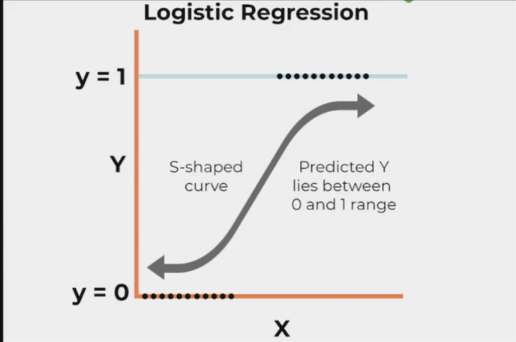

Logistic Regression is represented by a sigmoid function, an S-shaped curve that is useful in binary classification. In our case, we are trying to predict or classify customers who will churn or those who will not.

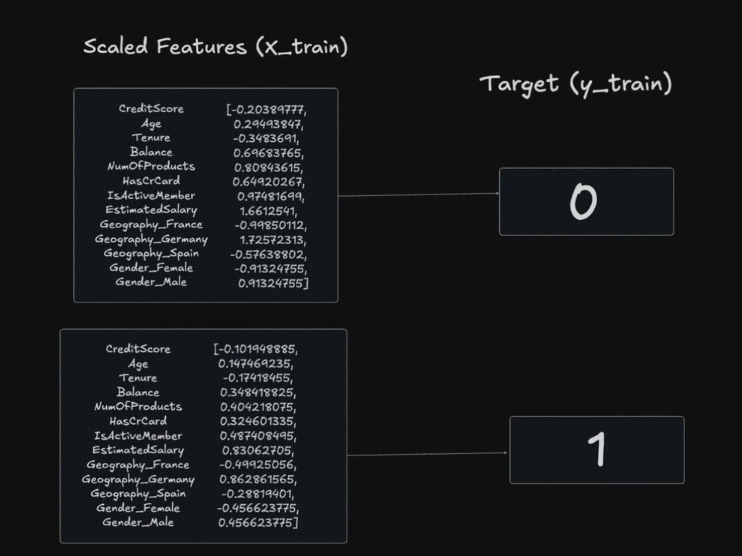

When we train our datasets with the model, the function iteratively perform logistic regression on each datasets. It iteratively tries to learn and updates the coefficients or weights of the model. Behind the scenes, the loss function for finding the most optimized weights is an updated gradient descent function.

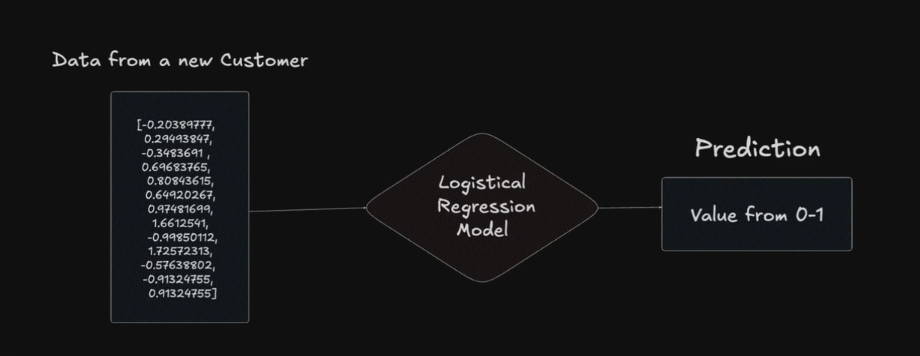

## Prediction

In [262]:
lr_predictions = lr_model.predict(X_test)
lr_predictions

array([0, 0, 0, ..., 0, 0, 0])

## Evaluation

In [258]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [266]:
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_accuracy

0.811

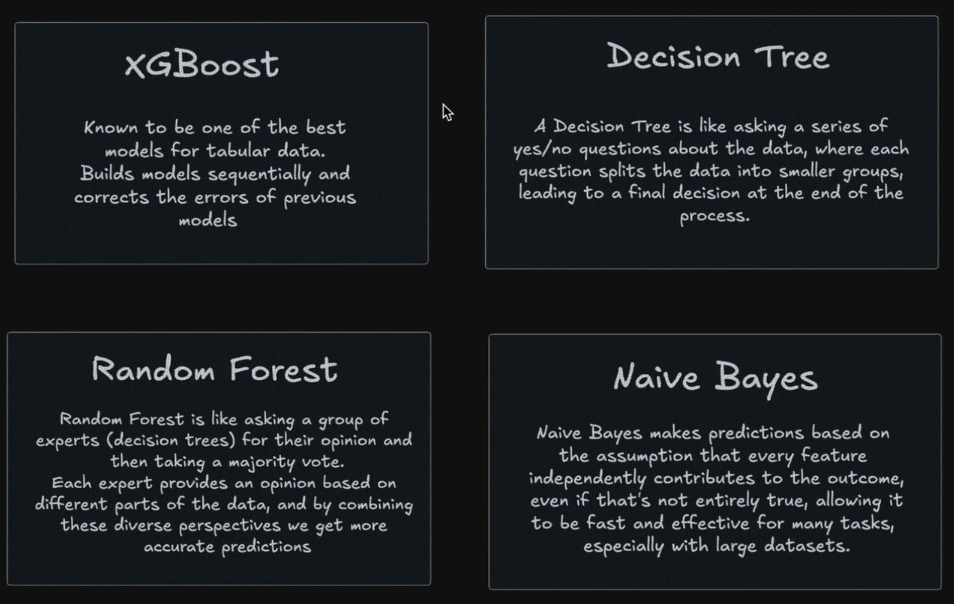